100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 2507.13it/s]


old rank 4
new rank 1
[[5.14 4.56 4.7  4.77]
 [4.11 3.65 3.76 3.82]
 [3.41 3.02 3.12 3.16]
 [4.12 3.66 3.77 3.83]
 [4.71 4.18 4.31 4.37]
 [4.97 4.41 4.54 4.61]]
[[5. 5. 0. 5.]
 [5. 0. 3. 4.]
 [3. 4. 0. 3.]
 [0. 0. 5. 3.]
 [5. 4. 4. 5.]
 [5. 4. 5. 5.]]
26.507497817531966


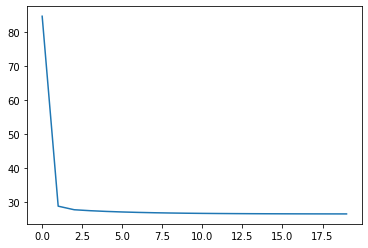

In [2]:
"""原始"""
import numpy as np
import math
from numpy.linalg import matrix_rank
from tqdm import tqdm
from functools import reduce
his = []
# np.random.seed(1)

def lmf(R,r,eta):
    f = lambda X,U,V:np.sum(W*(X-np.dot(U.T,V))**2) + eta*(np.sum(U**2)+np.sum(V**2))
    W = np.copy(R)
    W[W!=0]=1.0
    m , n = R.shape[0] , R.shape[1]
    X = np.random.randn(r,m)
    Y = np.random.randn(r,n)
    global his
    for t in tqdm(range(20)):
        f1 = f(R,X,Y)
        for u in range(m):
            a = np.matmul( np.matmul(Y,np.diag(W[u,:])) ,Y.T )
            b = np.matmul(Y,np.array([W[u,:]*R[u,:]]).T)
            a +=  eta*np.ones((r,r))
            X[:,u] = np.matmul(np.linalg.inv(a),b)[:,0]
        for i in range(n):
            a = np.matmul(np.matmul(X, np.diag(W[:,i])), X.T)
            b = np.matmul(X, np.array([W[:,i] * R[:,i]]).T)
            a +=  eta * np.ones((r, r))
            Y[:,i] = np.matmul(np.linalg.inv(a),b)[:,0]
        f2 = f(R,X,Y)
        if np.abs(f2-f1) < 1e-4:
            print(t+1)
            break
        his.append(f2)
    return X,Y
np.random.seed(1)
R = np.array([
    [5,5,0,5],
    [5,0,3,4],
    [3,4,0,3],
    [0,0,5,3],
    [5,4,4,5],
    [5,4,5,5]
]).astype(float)
# R= np.load('test.npy')[:,:10]
# print(R.shape)
# R = np.random.randint(0,5,(600,600)).astype(float)
# R = np.random.randint(0,255,(19200,100)).astype(float)
X,Y = lmf(R,1,0.5)
res = np.array(np.dot(X.T,Y))
from numpy.linalg import matrix_rank
print('old rank',matrix_rank(R))
print('new rank',matrix_rank(res))
print(np.round(res,2))
print(R)
print(his[-1])

import matplotlib.pyplot as plt
plt.plot(his)
plt.show()

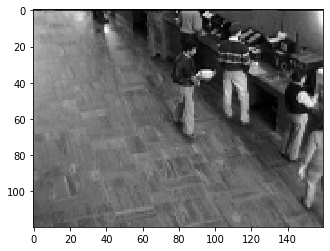

In [11]:
import cv2
b = res.astype(np.uint8)
plt.imshow(cv2.cvtColor(R[:,4].reshape(120,160), cv2.COLOR_BGR2RGB))

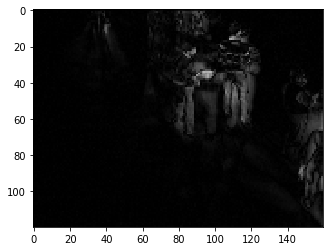

In [10]:
f = np.abs(R-res).astype(np.uint8)
plt.imshow(cv2.cvtColor(f[:,4].reshape(120,160), cv2.COLOR_BGR2RGB))

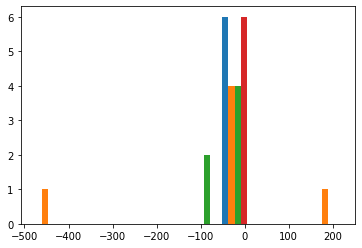

In [2]:
"""原始"""
import numpy as np
import math
from numpy.linalg import matrix_rank
from tqdm import tqdm
from functools import reduce
his = []
# np.random.seed(1)

def lmf(R,r,eta):
    f = lambda X,U,V:np.sum(W*(X-np.dot(U.T,V))**2) + eta*(np.sum(U**2)+np.sum(V**2))
    W = np.copy(R)
    W[W!=0]=1.0
    m , n = R.shape[0] , R.shape[1]
    X = np.random.randn(r,m)
    Y = np.random.randn(r,n)
    global his
    for _ in tqdm(range(200)):
        for u in range(m):
            a = np.matmul( np.matmul(Y,np.diag(W[u,:])) ,Y.T )
            b = np.matmul(Y,np.array([W[u,:]*R[u,:]]).T)
            a +=  eta*np.ones((r,r))
            X[:,u] = np.matmul(np.linalg.inv(a),b)[:,0]
        for i in range(n):
            a = np.matmul(np.matmul(X, np.diag(W[:,i])), X.T)
            b = np.matmul(X, np.array([W[:,i] * R[:,i]]).T)
            a +=  eta * np.ones((r, r))
            Y[:,i] = np.matmul(np.linalg.inv(a),b)[:,0]
        his.append(f(R,X,Y))
    return X,Y
np.random.seed(1)
R = np.array([
    [5,5,0,5],
    [5,0,3,4],
    [3,4,0,3],
    [0,0,5,3],
    [5,4,4,5],
    [5,4,5,5]
]).astype(float)
R += np.random.normal(0,0.1,(6,4))
# R = np.random.randint(0,5,(600,600)).astype(float)
# R = np.random.randint(0,255,(19200,100)).astype(float)
X,Y = lmf(R,2,0 )
res = np.array(np.dot(X.T,Y))
from numpy.linalg import matrix_rank
print('old rank',matrix_rank(R))
print('new rank',matrix_rank(res))
print(np.round(res,2))
print(R)
print(his[-1])

import matplotlib.pyplot as plt
plt.plot(his)
plt.show()